In [1]:
# import traci
#
# SUMO_BINARY = r"C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui"
# CONFIG_FILE = r"C:\Program Files (x86)\Eclipse\Sumo\doc\tutorial\quickstart\data\quickstart.sumocfg"
# # CONFIG_FILE = r"C:\Repos\rl_traffic_signal_optimization\models\20230718_sumo_ma\osm.sumocfg"

In [3]:
# sumo_cmd = [SUMO_BINARY, "-c", CONFIG_FILE, "--start", "--quit-on-end", "--tripinfo-output", tripinfo_file_name]
#
# traci.start(sumo_cmd)
#
# while traci.simulation.getMinExpectedNumber() > 0:
#     traci.simulationStep()

In [4]:
# traci.close()

In [80]:
from datetime import datetime
str(datetime.now().strftime("%Y%m%d%H%M%S"))

'20231129220849'

In [46]:
NAME = "diff-waiting-time100"

tripinfo_file = "tripinfo.xml"
# tripinfo_file = NAME + "-tripinfo.xml"
vehicle_file = NAME + "-controlled-vehicles.csv"

In [70]:
import pandas as pd

# vehicles = pd.read_csv(vehicle_file)
vehicles = pd.DataFrame(["veh30", "veh33", "veh3"], columns=["controlled_vehicles"])

In [71]:
from lxml import etree

root = etree.parse(tripinfo_file).getroot()
data = {"vehicle": [], "travel_time": [], "waiting_time": []}

for t in root.iter("tripinfo"):
    data["vehicle"].append(t.get("id"))
    data["travel_time"].append(int(float((t.get("duration")))))
    data["waiting_time"].append(int(float(t.get("waitingTime"))))

tripinfo = pd.DataFrame(data)

In [75]:
all_vehicles = tripinfo.merge(vehicles, left_on="vehicle", right_on="controlled_vehicles", how="left")
all_vehicles["controlled_vehicles"] = ~all_vehicles["controlled_vehicles"].isna()
only_controlled = all_vehicles[all_vehicles["controlled_vehicles"]].drop("controlled_vehicles", axis=1)
all_vehicles = all_vehicles.drop("controlled_vehicles", axis=1)

<Axes: ylabel='Count'>

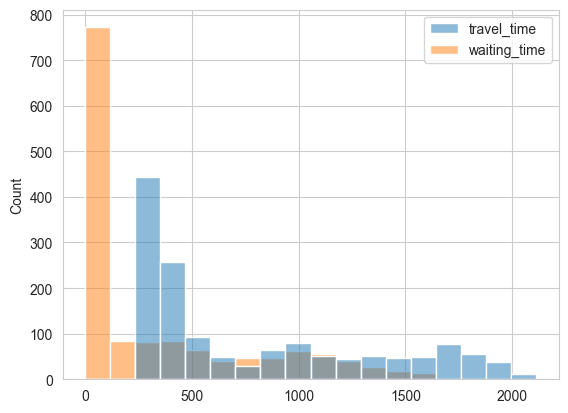

In [76]:
import seaborn as sns

sns.histplot(all_vehicles)

<Axes: ylabel='Count'>

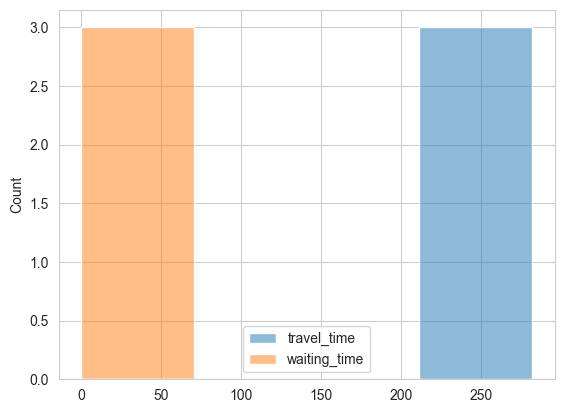

In [77]:
sns.histplot(only_controlled)

In [46]:
df = pd.read_csv("src/experiments/diff-waiting-time100-vehicle-times.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13883 entries, 0 to 13882
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vehicle_id             13883 non-null  object 
 1   depart_time            2681 non-null   float64
 2   arrive_time            2287 non-null   float64
 3   waiting_time           13883 non-null  float64
 4   is_controlled_vehicle  13883 non-null  bool   
dtypes: bool(1), float64(3), object(1)
memory usage: 447.5+ KB


In [47]:
df

,vehicle_id,depart_time,arrive_time,waiting_time,is_controlled_vehicle
0,bike3016,25205.0,25795.0,8.0,False
1,veh14404,25205.0,NaN,250.0,True
2,veh14409,25210.0,NaN,599.0,True
3,truck3603,25210.0,25440.0,38.0,False
4,veh14414,25215.0,NaN,73.0,False
...,...,...,...,...,...
13878,truck6597,NaN,NaN,0.0,False
13879,veh23390,NaN,NaN,0.0,False
13880,veh23391,NaN,NaN,0.0,False
13881,veh23392,NaN,NaN,0.0,False


In [52]:
complete_trips = df.dropna(subset=["depart_time", "arrive_time"])
complete_trips[complete_trips["is_controlled_vehicle"]]

,vehicle_id,depart_time,arrive_time,waiting_time,is_controlled_vehicle
14,veh14449,25250.0,26610.0,473.0,True
72,bike3083,25445.0,26520.0,601.0,True
107,truck3718,25555.0,26055.0,137.0,True
148,veh14904,25705.0,27000.0,803.0,True
165,veh14954,25755.0,26720.0,579.0,True
187,truck3808,25825.0,28215.0,696.0,True
200,veh15074,25875.0,28305.0,674.0,True
266,veh15304,26105.0,28140.0,448.0,True
272,veh15334,26135.0,26630.0,60.0,True
331,truck3973,26320.0,27745.0,590.0,True
